In [1]:
from pathlib import Path
import os
import copy
from hyperct import Complex
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._curvatures import b_curvatures_hn_ij_c_ij
from data.data_levelset_geometric_shapes.extract_and_process_interface_points import read_data


def HC_curvatures_sessile(HC, bV, r, theta_p, printout=False):
    R = r / np.cos(theta_p)
    K_f = (1 / R) ** 2
    H_f = 2 / R  # 2 / R
    HNdA_ij = []
    HNdA_i = []
    HN_i = []
    C_ij = []
    K_H_i = []
    HNdA_i_Cij = []
    Theta_i = []

    N_i = []  # Temp cap rise normal

    HNdA_i_cache = {}
    HN_i_cache = {}
    C_ij_cache = {}
    K_H_i_cache = {}
    HNdA_i_Cij_cache = {}
    Theta_i_cache = {}

    for v in HC.V:
        #TODO: REMOVE UNDER NORMAL CONDITIONS:
        if 0:
            if v in bV:
                continue
        N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
        N_f0 = normalized(N_f0)[0]
        N_i.append(N_f0)
        F, nn = vectorise_vnn(v)
        # Compute discrete curvatures
        c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
        # Append lists
        HNdA_ij.append(c_outd['HNdA_ij'])
        HNdA_i.append(c_outd['HNdA_i'])
        #HNdA_ij_dot.append(np.sum(np.dot(c_outd['HNdA_ij'], c_outd['n_i'])))
        HN_i.append(c_outd['HN_i'])
        C_ij.append(c_outd['C_ij'])
        K_H_i.append(c_outd['K_H_i'])
        HNdA_i_Cij.append(c_outd['HNdA_ij_Cij'])
        Theta_i.append(c_outd['theta_i'])
        
        # CIT paper:
        if 0:
            c_outd2 = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
            HN_i_2.append(c_outd2['HN_i'])
            HNdA_i_list.append(c_outd2['HNdA_i'])
            C_ij_i_list.append(c_outd2['C_ij'])

        # Append chace
        HNdA_i_cache[v.x] = c_outd['HNdA_i']
        HN_i_cache[v.x] = c_outd['HN_i']
        C_ij_cache[v.x] = c_outd['C_ij']
        K_H_i_cache[v.x] = c_outd['K_H_i']
        HNdA_i_Cij_cache[v.x] = c_outd['HNdA_ij_Cij']
        Theta_i_cache[v.x] = c_outd['theta_i']

    if printout:
        print('.')
        print(f'HNdA_ij = {HNdA_ij}')
        print(f'HN_i = {HN_i}')
        print(f'C_ij = {C_ij}')
        print(f'K_H_i = {K_H_i}')
        print(f'HNdA_i_Cij = {HNdA_i_Cij}')
        print(f'Theta_i= {Theta_i}')
        print(f'np.array(Theta_i) in deg = {np.array(Theta_i) *180/np.pi}')
        print(f'np.array(Theta_i)/np.pi= {np.array(Theta_i) / np.pi}')
        rati = 2 * np.pi /np.array(Theta_i)
        rati = 2 * np.pi / (2 * np.pi - np.array(Theta_i))
        rati =  2 * np.pi / (2 * np.pi - np.array(Theta_i))
        rati =  (np.pi - np.array(Theta_i)/ 2 * np.pi )
        print(f' rati = { rati}')
        print(f'HNdA_i[1] * rati[1]  = {HNdA_ij[1] * rati[1] }')
        print(f'C_ij   = {C_ij }')
        print('.')
        print(f'HNdA_i_Cij = {HNdA_i_Cij}')

        print('-')
        print('Errors:')
        print('-')

        print(f'K_H_i - K_f = {np.array(K_H_i) - K_f}')
        print(f'HN_i  - H_f = {HN_i - H_f}')
        print(f'HNdA_i_Cij  - H_f = {HNdA_i_Cij - H_f}')

        #print(f'np.sum(C_ij) = {np.sum(C_ij)}')

    return (HNdA_i, HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache)


In [2]:
filename = Path("../../ddgclib/data_levelset_geometric_shapes/sphere_fine/extraction_data_0.000000.txt")
result_folder = Path("../../ddgclib/data_levelset_geometric_shapes/X_intersections_sphere_coarse")
plot_single_cells = False

# Create the result folder
if not os.path.exists(result_folder):
    os.mkdir(result_folder)

In [3]:
# Read and plot the data
corners_and_intersections = read_data(filename)
#unique_intersections = extract_and_save_unique_intersection_points(corners_and_intersections, result_folder)
#plot_and_save_levelset_points(corners_and_intersections, result_folder)
#plot_unique_intersections(unique_intersections, result_folder)
#plot_intersection_points(corners_and_intersections, result_folder, plot_single_cells)

Total number of cells          :  1760
Total number of intersections  :  7032
Total number of levelset points:  1760


In [4]:
corners_and_intersections

[{'Corners': array([[0.34375 , 0.5     , 0.4375  ],
         [0.359375, 0.5     , 0.4375  ],
         [0.359375, 0.515625, 0.4375  ],
         [0.34375 , 0.515625, 0.4375  ],
         [0.34375 , 0.5     , 0.453125],
         [0.359375, 0.5     , 0.453125],
         [0.359375, 0.515625, 0.453125],
         [0.34375 , 0.515625, 0.453125]]),
  'Intersections': array([[0.35795535, 0.5       , 0.453125  ],
         [0.35881421, 0.515625  , 0.453125  ],
         [0.359375  , 0.5       , 0.44938558],
         [0.359375  , 0.515625  , 0.45164748]]),
  'Levelset': array([[0.35942609, 0.50739815, 0.44821111]])},
 {'Corners': array([[0.34375 , 0.5     , 0.453125],
         [0.359375, 0.5     , 0.453125],
         [0.359375, 0.515625, 0.453125],
         [0.34375 , 0.515625, 0.453125],
         [0.34375 , 0.5     , 0.46875 ],
         [0.359375, 0.5     , 0.46875 ],
         [0.359375, 0.515625, 0.46875 ],
         [0.34375 , 0.515625, 0.46875 ]]),
  'Intersections': array([[0.35795535, 0.5       

In [5]:
cell_corners_and_intersections = corners_and_intersections
def intersection_is_found(intersection, ref_intersections):
    return any([all([np.abs(coord - coord_ref) <= 1e-14 for coord, coord_ref in zip(intersection, ref_inter)]) for ref_inter in ref_intersections])
    # Get unique intersections
all_intersections    = [inter for data in cell_corners_and_intersections for inter in data["Intersections"]]
unique_intersections = np.unique(np.array(all_intersections), axis=0)


In [6]:
def plot_intersections(axes, intersections, corners, plot_thick):
   number_of_inter = len(intersections)
   for idx in range(0, number_of_inter):
      this_inter       = intersections[idx]
      this_inter_faces = find_cell_faces(this_inter, corners)
      for nxt_idx in range(idx+1, number_of_inter):
         next_inter       = intersections[nxt_idx]
         next_inter_faces = find_cell_faces(next_inter, corners)

         if len(this_inter_faces.intersection(next_inter_faces)) > 0:
            if plot_thick:
               axes.plot( [this_inter[0], next_inter[0]], [this_inter[1], next_inter[1]], [this_inter[2], next_inter[2]], marker="x", markersize=1.5, linewidth=0.5, color = "red")
            else:
               axes.plot( [this_inter[0], next_inter[0]], [this_inter[1], next_inter[1]], [this_inter[2], next_inter[2]], marker="x", markersize=0.25, linewidth=0.25, color = "red")


In [7]:
corners       = cell_corners_and_intersections[0]["Corners"]
intersections = cell_corners_and_intersections[0]["Intersections"]

In [8]:
corners, intersections, len(intersections)

(array([[0.34375 , 0.5     , 0.4375  ],
        [0.359375, 0.5     , 0.4375  ],
        [0.359375, 0.515625, 0.4375  ],
        [0.34375 , 0.515625, 0.4375  ],
        [0.34375 , 0.5     , 0.453125],
        [0.359375, 0.5     , 0.453125],
        [0.359375, 0.515625, 0.453125],
        [0.34375 , 0.515625, 0.453125]]),
 array([[0.35795535, 0.5       , 0.453125  ],
        [0.35881421, 0.515625  , 0.453125  ],
        [0.359375  , 0.5       , 0.44938558],
        [0.359375  , 0.515625  , 0.45164748]]),
 4)

In [9]:
def find_cell_faces(intersection_point, cell_corners):
   all_sides = [
      0 if intersection_point[0] == cell_corners[0][0] else None,
      1 if intersection_point[0] == cell_corners[6][0] else None,
      2 if intersection_point[1] == cell_corners[0][1] else None,
      3 if intersection_point[1] == cell_corners[6][1] else None,
      4 if intersection_point[2] == cell_corners[0][2] else None,
      5 if intersection_point[2] == cell_corners[6][2] else None
   ]
   return set([side for side in all_sides if side is not None])

# Pseudo-triangulation algorithm


In [10]:
#intersections, corners, plot_thick):
#if 1:
X = []
HC = Complex(3)

for index, c in enumerate(cell_corners_and_intersections):
    #if index % 25 == 0 or index == len(cell_corners_and_intersections) - 1:
    # Extract data
    corners       = c["Corners"]
    intersections = c["Intersections"]
    number_of_inter = len(intersections)
    for idx in range(0, number_of_inter):
       cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
       vc = HC.V[tuple(cm)]
       this_inter       = intersections[idx]
       this_inter_faces = find_cell_faces(this_inter, corners)
       for nxt_idx in range(idx+1, number_of_inter):
          next_inter       = intersections[nxt_idx]
          next_inter_faces = find_cell_faces(next_inter, corners)
          if len(this_inter_faces.intersection(next_inter_faces)) > 0:
             v1 = HC.V[tuple(this_inter)]
             v2 = HC.V[tuple( next_inter)]
             v1.connect(v2)
             v1.connect(vc)
             v2.connect(vc)
            #axes.plot( [this_inter[0], next_inter[0]], 
            #          [this_inter[1], next_inter[1]], 
            #          [this_inter[2], next_inter[2]], 
            #          marker="x", markersize=0.25, linewidth=0.25, color = "red")


<IPython.core.display.Javascript object>


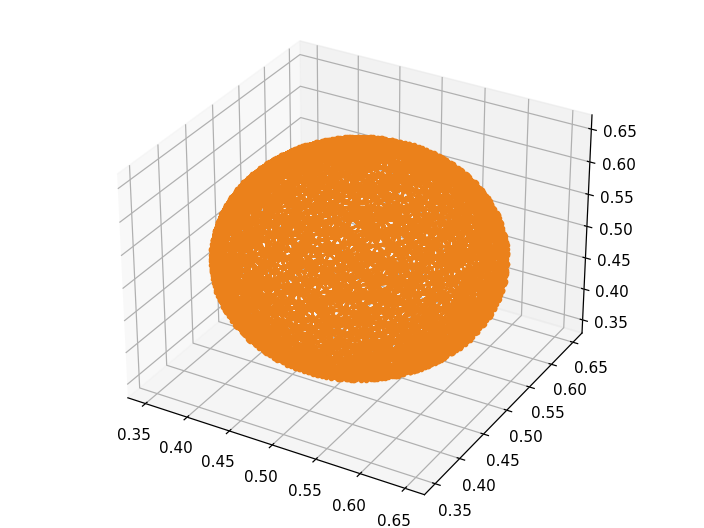

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [11]:
%matplotlib notebook
HC.plot_complex()

In [12]:
HC.V.size()

3518

In [13]:
HC.V.merge_all(1e-8)
HC.V.size()

3518

# Attempt 2:


In [15]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_i, HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
HNdA_ij

[array([[ 0.        ,  0.        ,  0.        ],
        [-0.00037254,  0.04431509,  0.00739805],
        [-0.00545821, -0.04612255,  0.00769979],
        [ 0.00285809, -0.04509877, -0.01405744],
        [ 0.00297264,  0.04690624, -0.00104041]], dtype=float128),
 array([[ 0.        ,  0.        ,  0.        ],
        [ 0.00545821, -0.04612255, -0.00769979],
        [-0.00230311, -0.04189961, -0.        ],
        [-0.00230311,  0.04189961, -0.        ],
        [ 0.00520871,  0.        , -0.01371992],
        [-0.00343608, -0.01585792,  0.01585792],
        [-0.00343608,  0.01585792,  0.01585792],
        [ 0.00028771, -0.        , -0.00106163],
        [ 0.00545821,  0.04612255, -0.00769979]], dtype=float128),
 array([[ 0.        ,  0.        ,  0.        ],
        [ 0.00195763,  0.01190803,  0.        ],
        [-0.00078274,  0.00559797,  0.006224  ],
        [ 0.00142402,  0.        , -0.00375189],
        [ 0.00230311,  0.04189961, -0.        ],
        [-0.00503427, -0.01541351

In [16]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

#(HNda_v_cache, K_H_cache, C_ijk_v_cache, HN_i,  HNdA_ij_dot_hnda_i,
# K_H_2, HNdA_i_Cij) = int_curvatures(HC, bV, r, theta_p, printout=0)

# Comparison with analytical solution

The sphere has a radius of $r = 0.15$ m and therefore a point-wise mean ("fluid mean") curvature of $H = \frac{2}{r}$  and an area of $A = 4\pi r^2$

$$ \int H N dA = \frac{2}{r} \cdot 4\pi r^2 = 8 \pi r  $$

In [17]:
2/r, np.abs(np.array(HN_i)), (np.abs(np.array(HN_i))- 2/r)

(13.333333333333333827,
 array([3.73219554e-05, 4.80792085e+00, 2.07393886e+01, ...,
        1.64056953e-03, 6.85522064e-12, 4.80632581e-05], dtype=float128),
 array([-13.33329601,  -8.52541248,   7.40605526, ..., -13.33169276,
        -13.33333333, -13.33328527], dtype=float128))

In [18]:
np.sum(np.linalg.norm(HNdA_i, axis=1)), 8*np.pi*r

(8.469221369523709882, 3.7699111843077515998)

In [22]:
abs((np.sum(np.linalg.norm(HNdA_i, axis=1)) - 8*np.pi*r)/8*np.pi*r)*100  # Error percentage

27.681221915276520018

In [19]:
np.sum(HNdA_i, axis=0)  # Should have all zero components

array([-0.04902057,  0.03553996,  0.01390946], dtype=float128)

# Check comparison with Qhull


In [43]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)

In [44]:
import scipy.spatial 
tri = scipy.spatial.Delaunay(X)

In [45]:
HC.vf_to_vv(tri.points, tri.simplices)


<IPython.core.display.Javascript object>


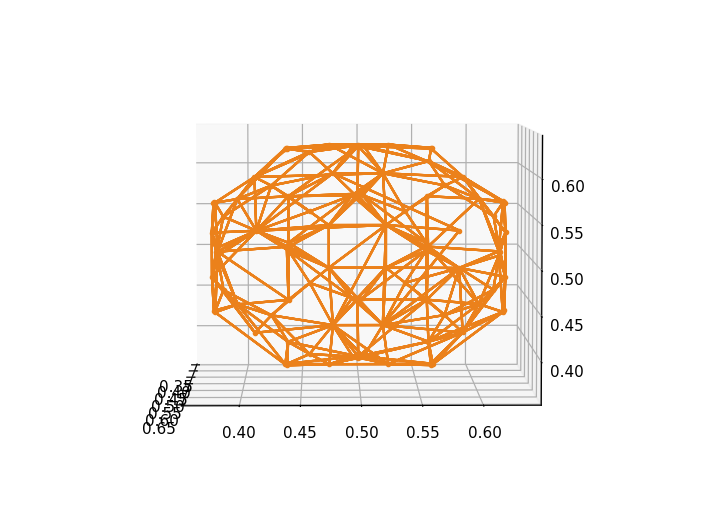

(0.35, 0.65)

In [46]:
%matplotlib notebook
X = np.array(X)
hcv = copy.copy(HC.V)
for v in hcv:
    if v.x_a[0] > 0.5:
        HC.V.remove(v)

fig, axes, _, _ = HC.plot_complex()
axes.axes.set_xlim3d(left=0.35, right=0.65)

<IPython.core.display.Javascript object>


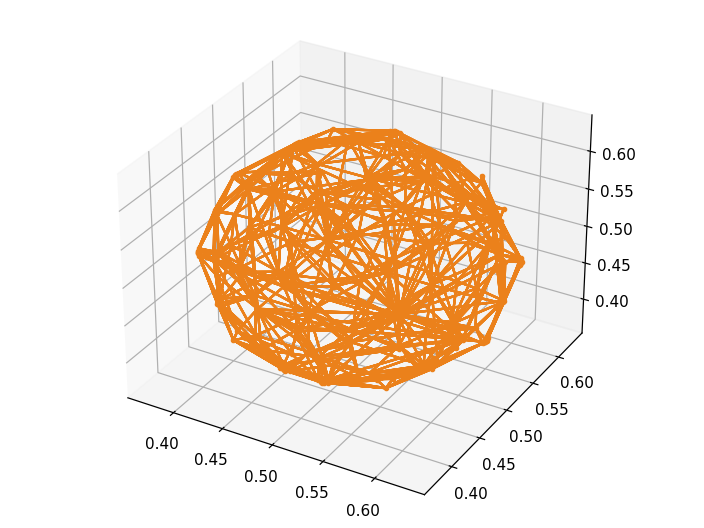

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [34]:
HC.plot_complex()

<IPython.core.display.Javascript object>


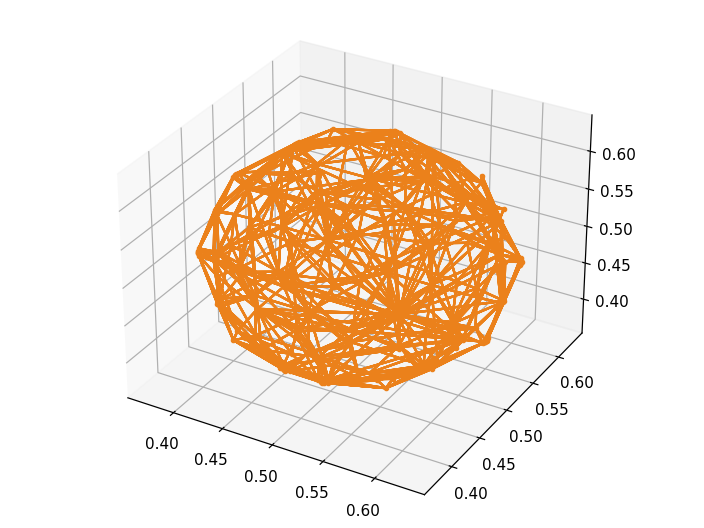

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [60]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)
tri = scipy.spatial.Delaunay(X)
dV = HC.boundary_d(HC.V)
HC.vf_to_vv(tri.points, tri.simplices)

HC.plot_complex()

In [61]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_i, HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
HNdA_ij

[array([[ 0.        ,  0.        ,  0.        ],
        [-0.        , -0.        , -0.04997393],
        [ 0.00811342,  0.02636386, -0.05272772],
        [-0.01618715,  0.        ,  0.07032791],
        [-0.00461348, -0.00709782,  0.04008811],
        [ 0.        , -0.04703495,  0.13282552],
        [ 0.03387505,  0.        , -0.11007405],
        [-0.00437121,  0.04394583, -0.02540123],
        [-0.04012756,  0.03381061, -0.0323082 ],
        [-0.        , -0.16292362,  0.16292362]], dtype=float128),
 array([[ 0.        ,  0.        ,  0.        ],
        [-0.00460834,  0.00460834, -0.        ],
        [-0.002342  ,  0.00720633, -0.01017525],
        [-0.01614459, -0.0015655 ,  0.05688137],
        [ 0.        ,  0.04703495, -0.13282552],
        [ 0.09461434, -0.07492192,  0.06262796],
        [-0.00050046,  0.00153992,  0.00217435]], dtype=float128),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.87501661e-02, -2.87501661e-02,  0.00000000e+00],
        [

In [62]:
np.sum(np.linalg.norm(HNdA_i, axis=1)), 8*np.pi*r

(20.29519215247895729, 3.7699111843077515998)

In [63]:
2/r, np.abs(np.array(HN_i)), (np.abs(np.array(HN_i))- 2/r)

(13.333333333333333827,
 array([1.24721040e+00, 1.54390473e+00, 9.72552456e+00, 1.85352324e+00,
        1.05729432e+01, 1.74674570e+00, 5.74502775e-01, 9.48978704e+00,
        1.28923878e+01, 7.40437708e+00, 2.01906479e+01, 3.58976161e+00,
        6.55774696e+00, 7.64386760e+00, 7.91797937e+00, 6.04828282e+00,
        8.12020477e+00, 3.62456995e-02, 6.78213670e+00, 8.81563782e+00,
        2.68661983e+01, 1.46428669e+00, 3.42536391e+01, 2.52875723e+00,
        2.19897081e+01, 5.54003310e+01, 1.61891817e+01, 5.38953398e+00,
        7.36024061e+00, 3.33130061e+01, 4.13344198e+00, 1.42992947e+00,
        1.80531754e+01, 4.60490906e+00, 3.30030172e+00, 1.76179346e+00,
        4.03485239e+00, 1.04041511e+01, 9.07746009e+00, 3.86964772e-01,
        2.13174150e+00, 2.35080931e+00, 5.16886543e-01, 6.49226358e+00,
        1.78755893e+00, 9.60701061e+00, 7.12747990e+00, 6.44730261e+00,
        2.73768916e+00, 9.40327046e+00, 9.89817050e+00, 4.57305506e+01,
        1.08917323e+02, 1.00643932e+02, 

# QHull without centroids

In [67]:
import scipy.spatial 
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)
tri = scipy.spatial.Delaunay(X)
dV = HC.boundary_d(HC.V)
HC.vf_to_vv(tri.points, tri.simplices)
#HC.plot_complex()

r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_i, HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
np.sum(HNdA_ij, axis=0), 8*np.pi*r

ValueError: operands could not be broadcast together with shapes (10,3) (7,3) 

In [ ]:
2/r, np.abs(np.array(HN_i)), (np.abs(np.array(HN_i))- 2/r)

In [79]:
np.sum(HNdA_ij), 4*np.pi*r

(1.6274476395681572159, 1.8849555921538757999)

In [80]:
np.linalg.norm(HNdA_ij), 4*np.pi*r 

(2.1004153601880431112, 1.8849555921538757999)

In [88]:
HC.V.size()

137

In [89]:
HC.V.merge_all(1e-8)
HC.V.size()

137